# Task 1:

I shall be using Cirq to complete all the tasks

Let's start by installing and importing Cirq.

In [1]:
!pip install --quiet cirq

In [2]:
# general imports
import math
import numpy as np
import matplotlib.pyplot as plt

# importing cirq
import cirq

In [3]:
# print the current cirq version in use
print(f"Cirq version: {cirq.__version__}")

Cirq version: 1.1.0


1) Implementing a simple quantum operation with Cirq:

- With 5 qubits 
- Apply Hadamard operation on every qubit 
- Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- SWAP (0, 4) 
- Rotate X with pi/2 on any qubit 
- Plot the circuit 


### Building the required circuit:
Note: There's a more effecient way of implementing the code in the cell below. I have done it in the following way just to show the steps.

In [4]:
# Initializing a circuit
my_circuit = cirq.Circuit()

# Initializing the qubits
num_qubits = 5
my_qubits = cirq.LineQubit.range(num_qubits)

# For applying Hadarmard on all qubits
H_layer = cirq.Moment(cirq.H.on_each(my_qubits))
my_circuit.append(H_layer)

# Applying the required CNOTs
my_circuit.append([
  cirq.CNOT(my_qubits[i],my_qubits[i+1]) for i in range(num_qubits - 1)
])

# Applying SWAP on qubits 0 and 4
my_circuit.append(cirq.SWAP(my_qubits[0],my_qubits[4]))

# Applying an X rotation of pi/4 on the first qubit
rx = cirq.rx(math.pi/4)
my_circuit.append(rx(my_qubits[0]))

# Plotting the circuit (printing it)
print(my_circuit)

0: ───H───@───────────────×───Rx(0.25π)───
          │               │
1: ───H───X───@───────────┼───────────────
              │           │
2: ───H───────X───@───────┼───────────────
                  │       │
3: ───H───────────X───@───┼───────────────
                      │   │
4: ───H───────────────X───×───────────────


2) Implement a second circuit with a framework of your choice:

- Apply a Hadmard gate to the first qubit
- Rotate the second qubit by pi/3 around X
- Apply Hadamard gate to the third and fourth qubit
- Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>


In [5]:
# Initializing the circuit
my_circuit_2 = cirq.Circuit()

# Initializing 4 qubits
num_qubits_2 = 4
my_qubits_2 = cirq.LineQubit.range(4)

# Creating an instance of rotation gate with pi/3 rotation around X
rx = cirq.rx(math.pi/3)

# adding the required gates
my_circuit_2.append([
    cirq.H(my_qubits_2[0]),
    rx(my_qubits_2[1]),
    cirq.H(my_qubits_2[2]),
    cirq.H(my_qubits_2[3])
])

print(my_circuit_2)

0: ───H────────────

1: ───Rx(0.333π)───

2: ───H────────────

3: ───H────────────


### Swap test

The swap test is used to measure the similarity (in terms of the dot product) of two qubits.

By looking at the circuit above we should obtain that the:
- qubits 0 and 1 are not similar i.e, have a dot product less than 1
- qubits 2 and 3 are similar and should have a dot product equal to 1

<AxesSubplot:title={'center':'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

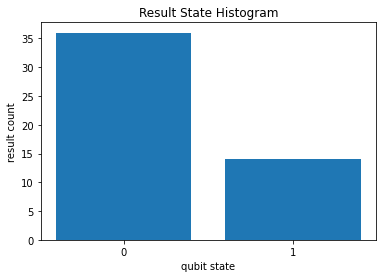

In [6]:
# The swap test circuit for q0 and q1:

my_circuit_2_1 = cirq.Circuit()
num_qubits_2 = 4
my_qubits_2 = cirq.LineQubit.range(4)
rx = cirq.rx(math.pi/3)
my_circuit_2_1.append([
    cirq.H(my_qubits_2[0]),
    rx(my_qubits_2[1]),
    cirq.H(my_qubits_2[2]),
    cirq.H(my_qubits_2[3])
])

swap_01 = cirq.NamedQubit('for <q0|q1>')
my_circuit_2_1.append([
    cirq.H(swap_01),
    cirq.CSWAP(swap_01,my_qubits_2[0],my_qubits_2[1]),
    cirq.H(swap_01)  
])

my_circuit_2_1.append(cirq.measure(swap_01))

sim = cirq.Simulator()
result = sim.run(my_circuit_2_1, repetitions = 50)
cirq.plot_state_histogram(result)

$$<q0|q1>^2  = 1 - 2*\frac{count_{|1>}}{shots}$$ 

where $\frac{count_{|1>}}{shots} = P(|1>)$


$$<q0|q1>^2  = 1 - \frac{2}{50}*15$$

$$<q0|q1>^2 = 0.4$$

Which implies that both the state $|q0> and\ |q1>$ are not the same.

<AxesSubplot:title={'center':'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

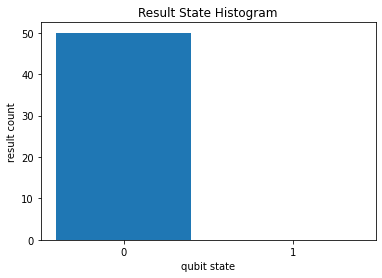

In [7]:
# The swap test circuit for q2 and q3:

my_circuit_2_2 = cirq.Circuit()
num_qubits_2 = 4
my_qubits_2 = cirq.LineQubit.range(4)
rx = cirq.rx(math.pi/3)
my_circuit_2_2.append([
    cirq.H(my_qubits_2[0]),
    rx(my_qubits_2[1]),
    cirq.H(my_qubits_2[2]),
    cirq.H(my_qubits_2[3])
])

swap_23 = cirq.NamedQubit('for <q2|q3>')
my_circuit_2_2.append([
    cirq.H(swap_23),
    cirq.CSWAP(swap_23,my_qubits_2[2],my_qubits_2[3]),
    cirq.H(swap_23)  
])

my_circuit_2_2.append(cirq.measure(swap_23))

sim = cirq.Simulator()
result = sim.run(my_circuit_2_2, repetitions = 50)
cirq.plot_state_histogram(result)

$$<q2|q3>^2  = 1 - 2*\frac{count_{|1>}}{shots}$$ 

where $\frac{count_{|1>}}{shots} = P(|1>)$


$$<q2|q3>^2  = 1 - \frac{2}{50}*0$$

$$<q2|q3>^2 = 1$$


Which implies that both the state $|q2> and \ |q3>$ are the same.